In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from keras.datasets import mnist

Using TensorFlow backend.


### PCA on MNIST

In [2]:
(x,y),(x_,y_) = mnist.load_data()
x = x.reshape(-1,784)
x_ = x_.reshape(-1,784)

print (x.shape,y.shape)
print (x_.shape,y_.shape)
print (np.unique(y,return_counts=True))

(60000, 784) (60000,)
(10000, 784) (10000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [3]:
A = np.cov(x.T)
print (A.shape)

(784, 784)


In [4]:
eig_val,eig_vec = np.linalg.eig(A)
print (eig_val.shape)

(784,)


In [5]:
eig_list = []
for ix in range(eig_val.shape[0]):
    temp = [eig_val[ix],eig_vec[ix]]
    eig_list.append(temp)
    
print (len(eig_list))

784


In [6]:
eig_list = sorted(eig_list, key=lambda x : x[0], reverse=True)

In [7]:
sorted_lamda = []
sorted_P = []

for ix in range(len(eig_list)):
    sorted_lamda.append(eig_list[ix][0])
    sorted_P.append(eig_list[ix][1])
    
sorted_lamda = np.asarray(sorted_lamda)
sorted_P = np.asarray(sorted_P)

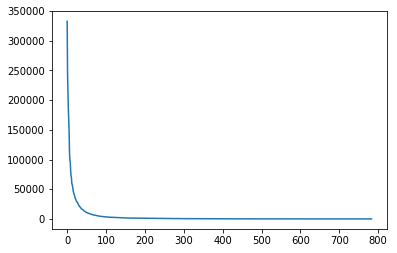

In [8]:
# plot of eigenvalues

plt.plot(sorted_lamda)

/home/yash/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


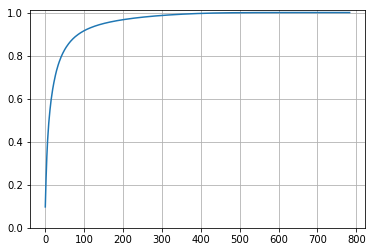

In [9]:
# explained variances
plt.figure(11)
plt.grid("on")
plt.ylim(0,1.01)
plt.plot(np.cumsum(sorted_lamda)/sorted_lamda.sum())
plt.show()

In [10]:
explained_variances = np.cumsum(sorted_lamda)/sorted_lamda.sum()
explained_variances[2]

0.22969677181176484

In [11]:
Z = x.dot(sorted_P)
print (x.shape)

(60000, 784)


In [12]:
img_org = x[0].reshape((28,28))
img_reco = Z[0].astype(np.uint8).reshape((28,28))

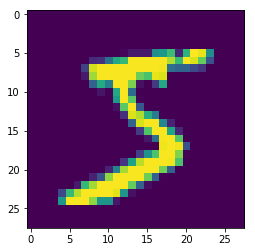

In [13]:
plt.imshow(img_org)

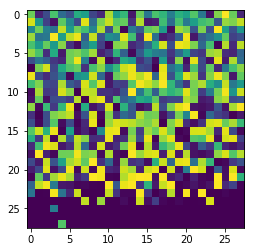

In [14]:
plt.imshow(img_reco)

In [15]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

X_t = pca.fit_transform(x)
print (X_t.shape)

In [ ]:
colors = ['red','blue','green','yellow','pink','black','violet','cyan','brown','magenta']
plt.figure()
for ix in range(5000):
    plt.scatter(X_t[ix,0], X_t[ix,1], color= colors[y[ix]])
plt.show()